# Importing necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets

In [14]:
transactions_path = 'Transactions (1).csv'
products_path = 'Products.csv'
customers_path = 'Customers.csv'

transactions_df = pd.read_csv(transactions_path)
products_df = pd.read_csv(products_path)
customers_df = pd.read_csv(customers_path)

# Merging the datasets for a unified view
merged_df = transactions_df.merge(products_df, on='ProductID').merge(customers_df, on='CustomerID')

In [15]:
# Summary statistics
summary_stats = merged_df.describe()

In [16]:
# Check for missing values
missing_values = {
    "Transactions": transactions_df.isnull().sum(),
    "Products": products_df.isnull().sum(),
    "Customers": customers_df.isnull().sum()
}

# Top 5 products by total revenue
top_products = merged_df.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Sales by category
sales_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# Number of customers by region
customers_by_region = customers_df['Region'].value_counts()

# Monthly sales trend
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M')
monthly_sales = merged_df.groupby('Month')['TotalValue'].sum()

# Summary statistics of the merged dataset

In [23]:
print("Summary Statistics:")
print(summary_stats)
print("\nMissing Values:")
print(missing_values)

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000

Missing Values:
{'Transactions': TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64, 'Products': ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64, 'Customers': CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64}


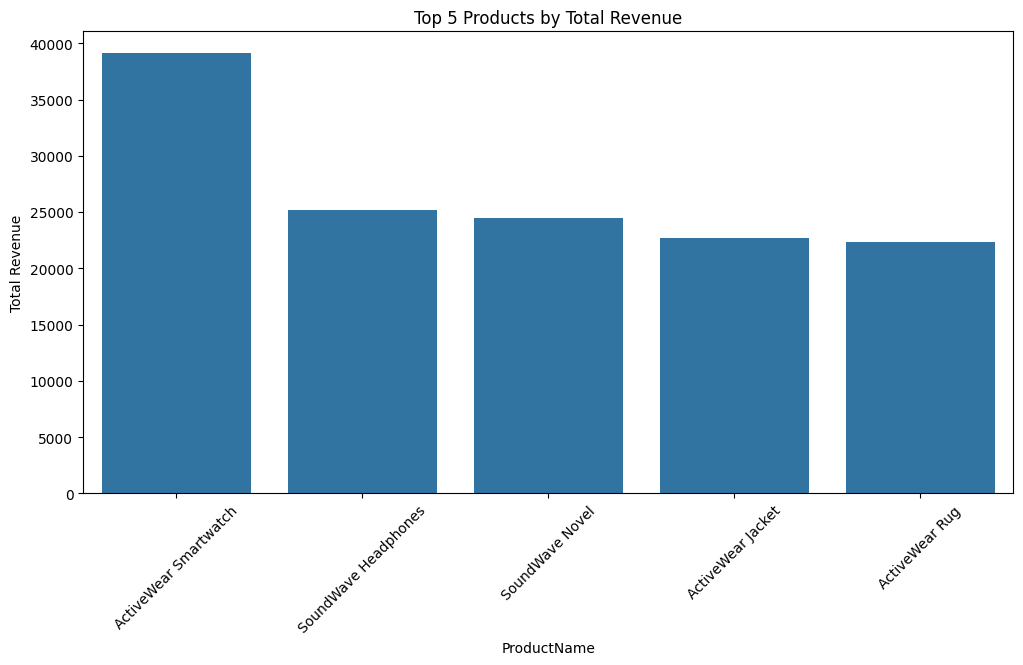

In [17]:
# Plot: Top 5 products by total revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title("Top 5 Products by Total Revenue")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

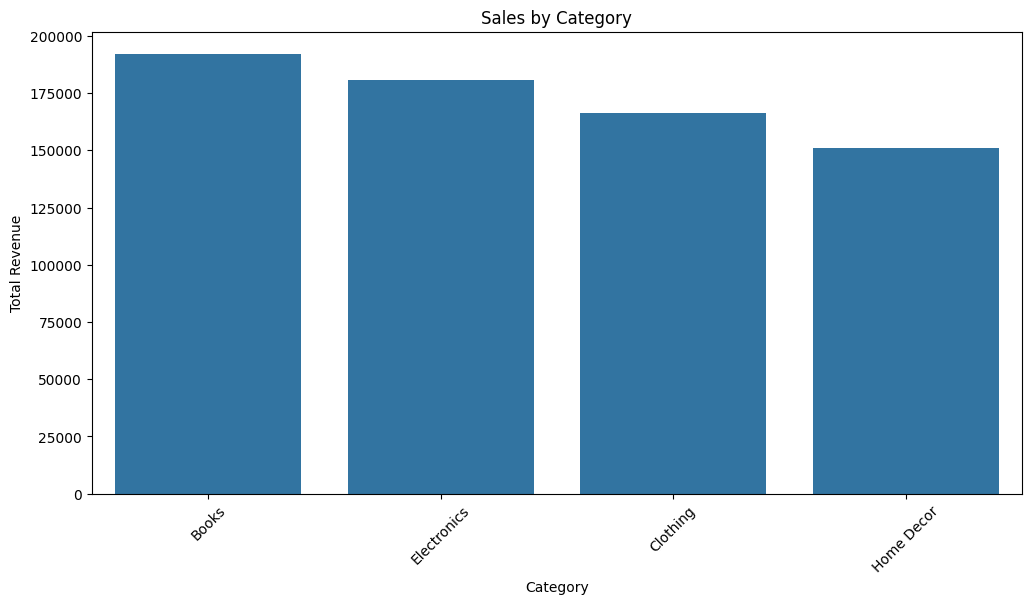

In [18]:
# Plot: Sales by category
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_category.index, y=sales_by_category.values)
plt.title("Sales by Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

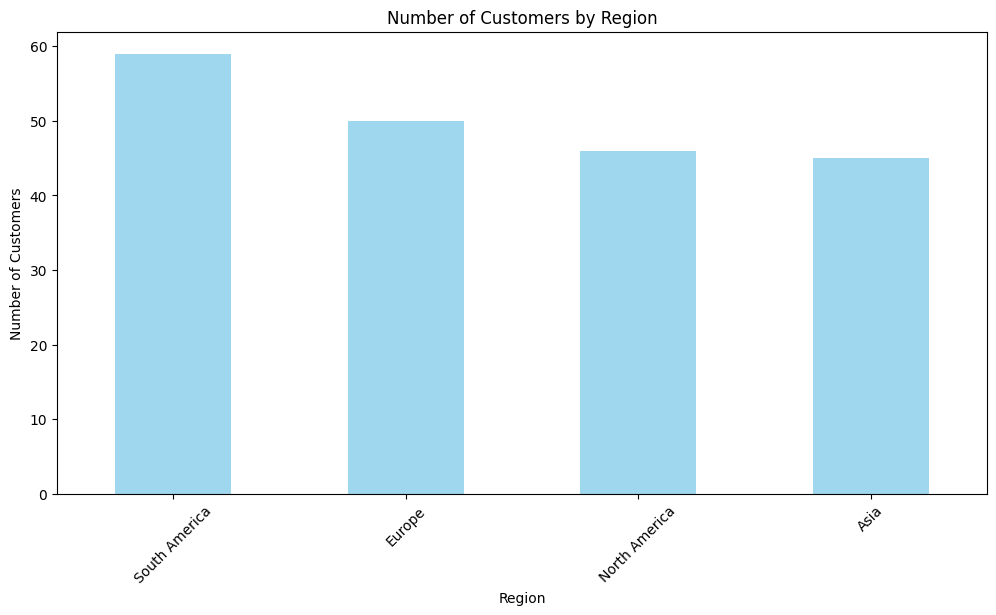

In [19]:
# Plot: Customers by region
plt.figure(figsize=(12, 6))
customers_by_region.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

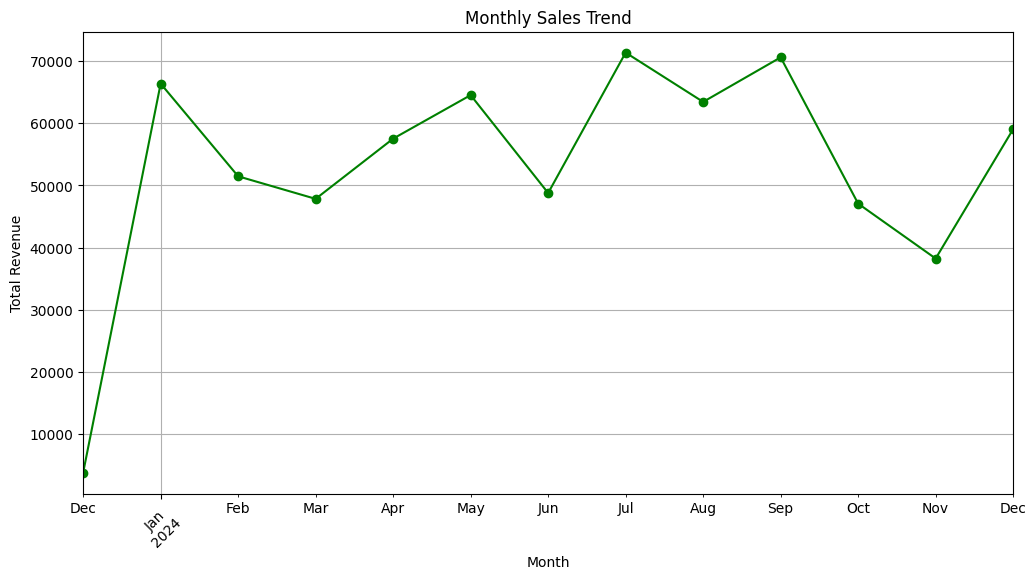

In [20]:
# Plot: Monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.ylabel("Total Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

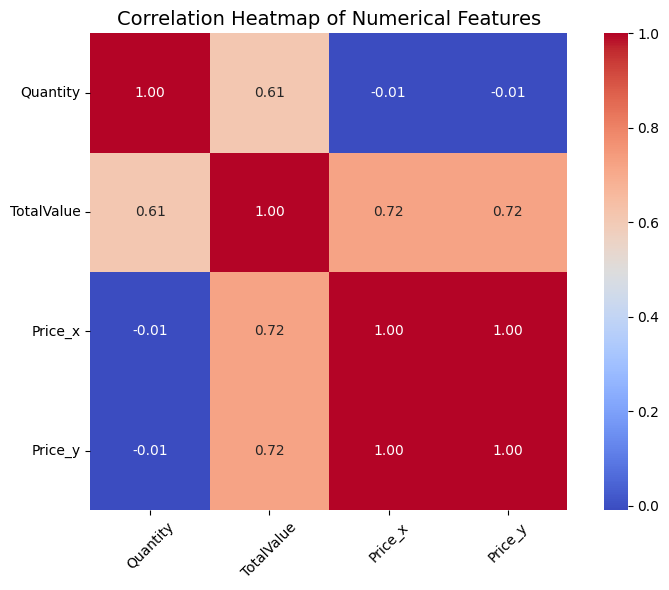

In [24]:
# Select only numerical features for correlation analysis
numerical_features = merged_df[['Quantity', 'TotalValue', 'Price_x', 'Price_y']]

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()